# Telco Customer Churn Analysis

## Info of dataset
1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

## Importing the Necessary Libraries

In [1]:
# Basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#checking the shape
df.shape

(7043, 21)

# Exploratory Data Analysis

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#checking the datatypes of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#checking for duplicated records
df[df.duplicated]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is catagorical hence distribution is not proper

75% of customers have tenure less the 55 months

average monthely charges are USD 64.76 and 75% of the cuatomers pay more then USD 89.85

Text(0.5, 1.0, 'count of target variable per category')

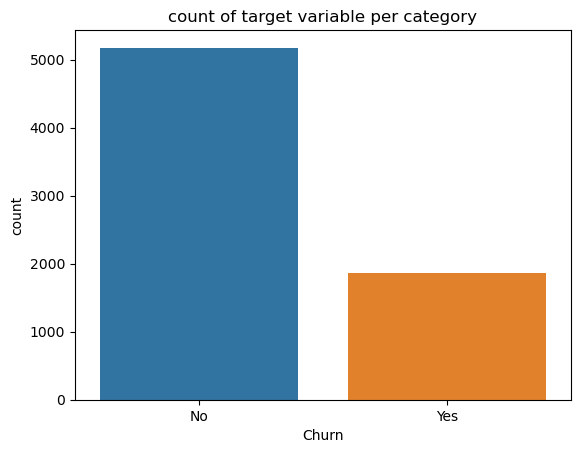

In [8]:
sns.countplot(x="Churn", data=df)
plt.title('count of target variable per category')

In [9]:
df.Churn.value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imblanced 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#copying the dataset 
new_df = df.copy()

In [13]:
#converting totalcharges dtype from object to numeric data 
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')

In [14]:
new_df.TotalCharges.dtypes

dtype('float64')

In [15]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

there are some null values in the totalcharges column

In [16]:
new_df[new_df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
#dropping the null values since it wont make much difference
new_df.dropna(axis=0, inplace=True)

In [18]:
#dividing customer into bins based on tenure eg: for tenure < 12 months assign tenure group of 1-12 , 
#and for tenure between 1 to 2 years assign tenure group of 13-24.....and so on.....


#checking for max tenure
new_df.tenure.max()

72

In [19]:
#group the tenure in months of 12
labels= ['{0} - {1}'.format(i, i+11) for i in range(1,72,12)]

new_df['tenure_group']= pd.cut(new_df.tenure, range(1,80,12), right=False, labels=labels)

In [20]:
new_df.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [21]:
#dopping unwanted columns
new_df.drop(columns= ['customerID', 'tenure'], axis=1, inplace=True)

In [22]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Visualization

## Univariant Analysis

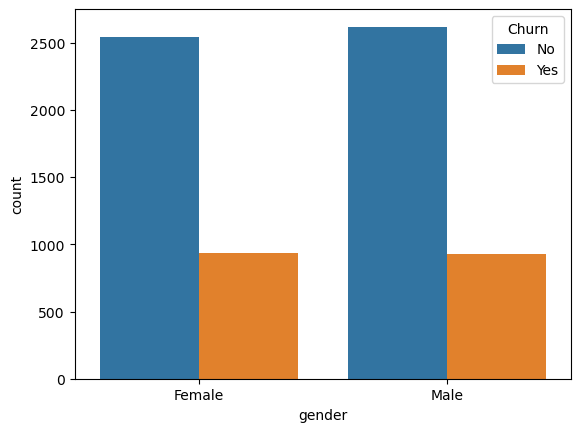

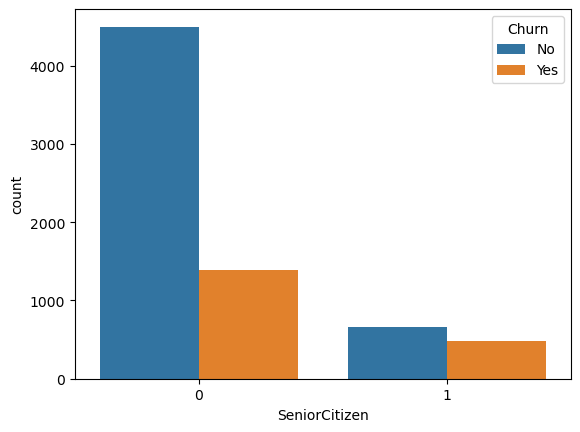

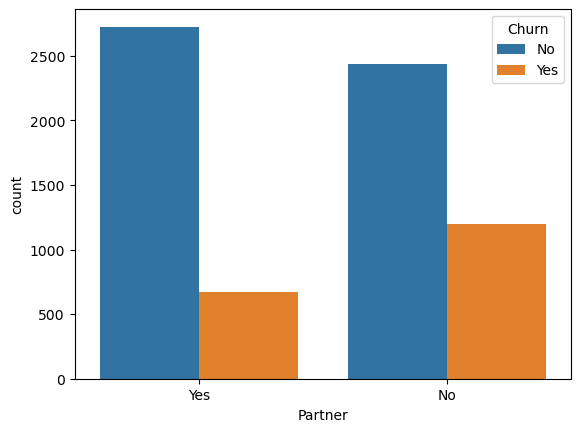

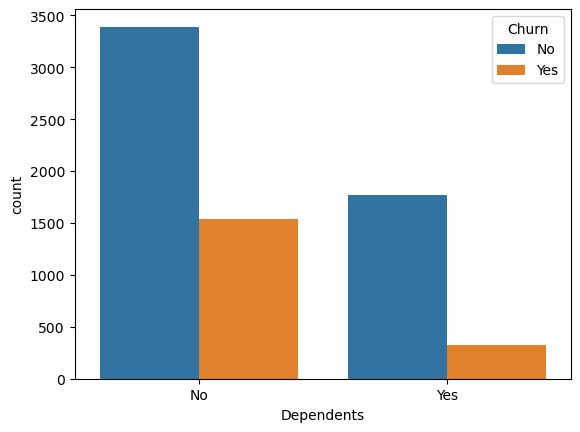

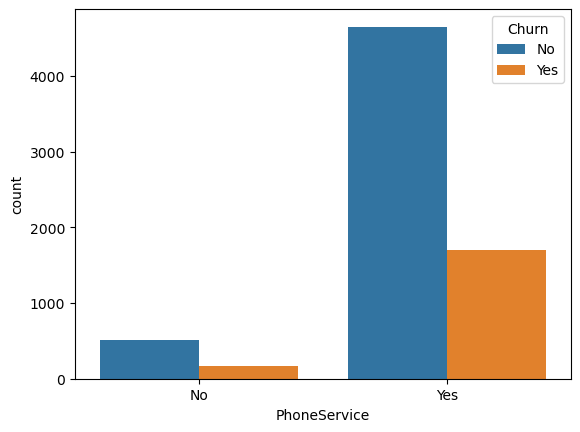

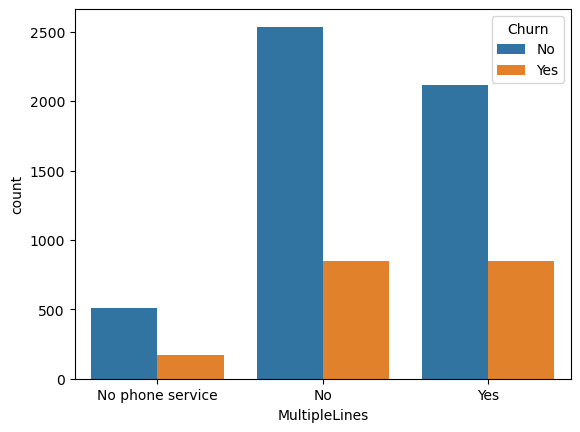

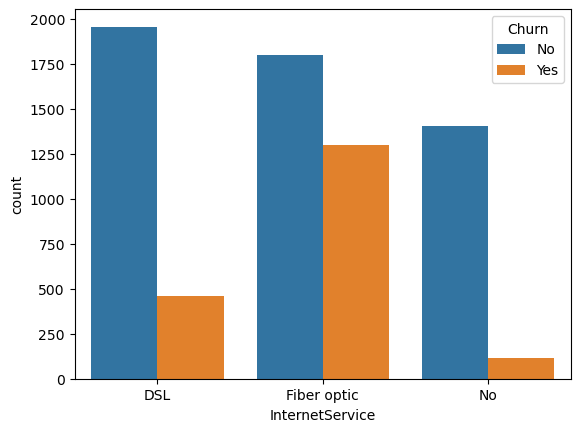

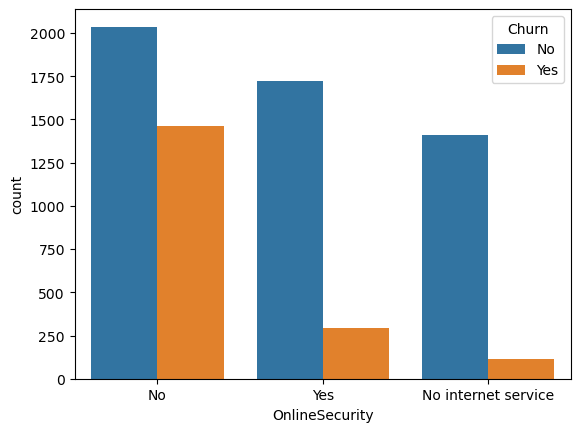

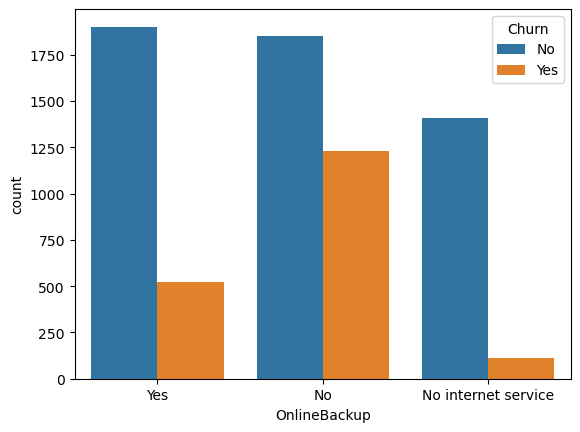

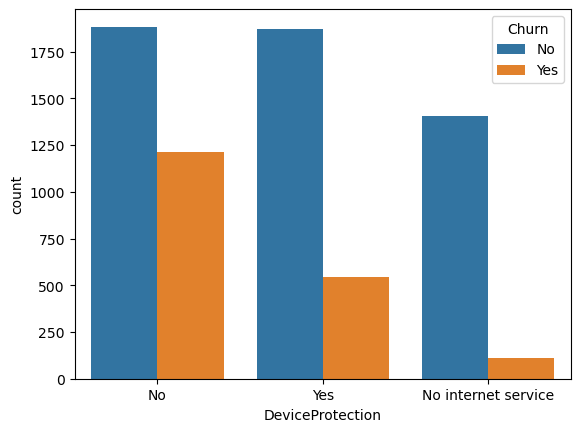

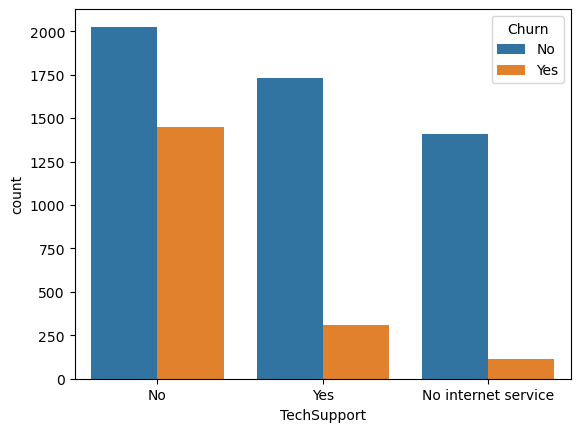

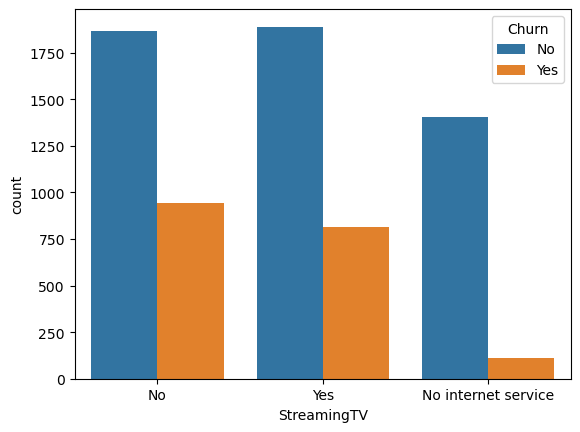

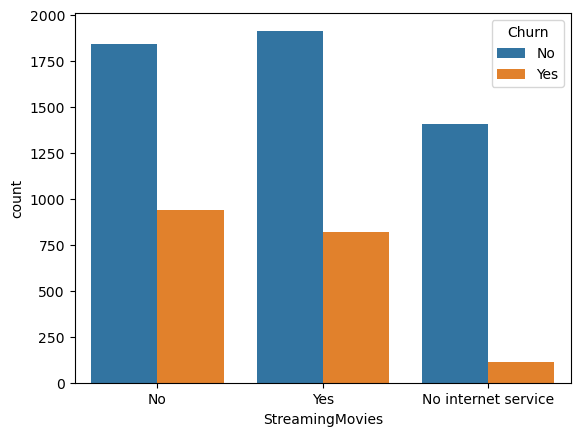

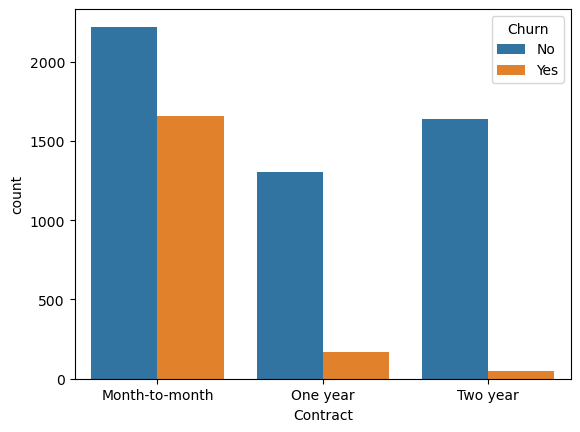

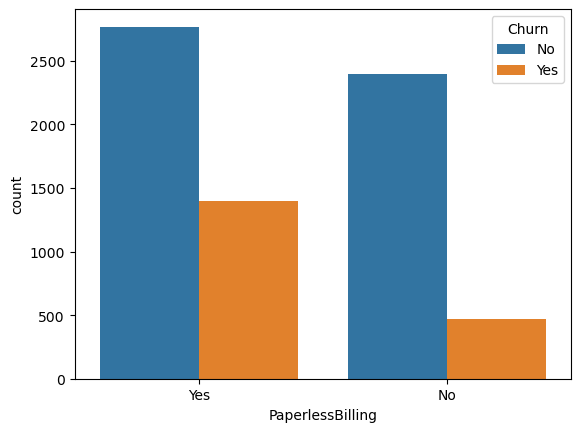

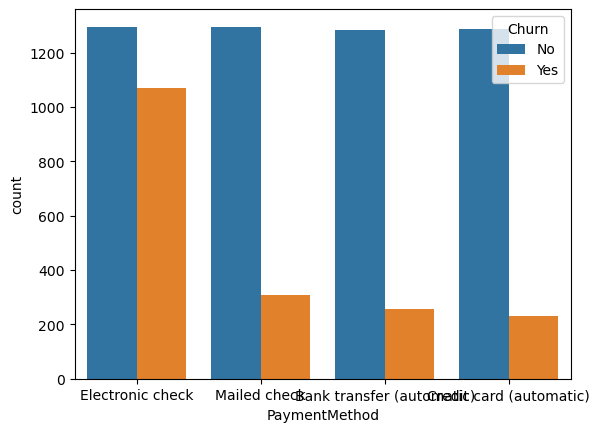

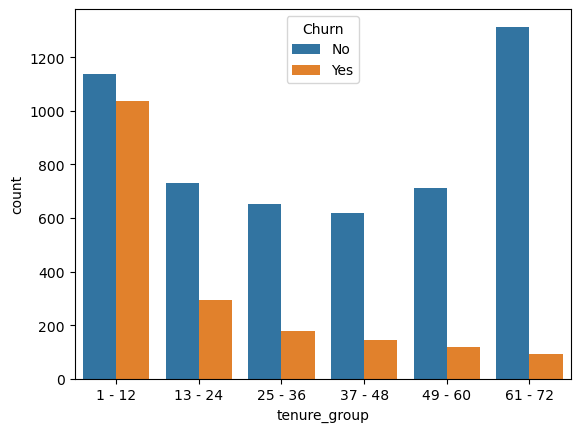

In [23]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data= new_df, x= predictor, hue= 'Churn')

In [24]:
#Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [25]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [26]:
#Convert all the categorical variables into dummy variables
df3 = pd.get_dummies(new_df, drop_first = True)

In [27]:
df3.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

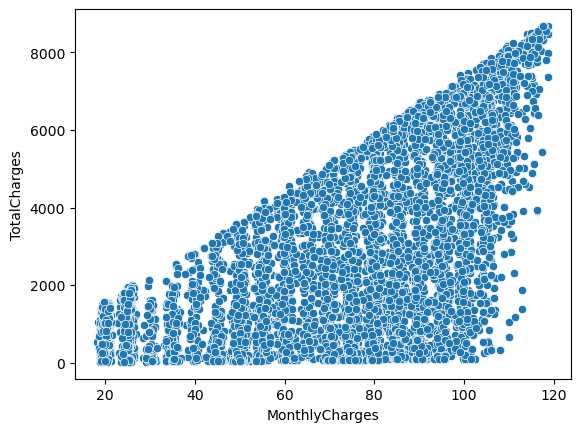

In [28]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data= df3)

total charges increases as monthly charges increases

Text(0.5, 1.0, 'Monthly charges by churn')

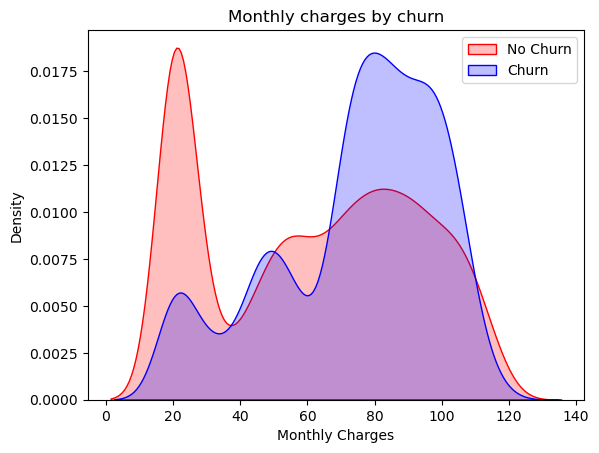

In [29]:
relation_MC = sns.kdeplot(df3.MonthlyCharges[(df3["Churn"] == 0) ],
                color="Red", shade = True)
relation_MC = sns.kdeplot(df3.MonthlyCharges[(df3["Churn"] == 1) ],
                ax =relation_MC, color="Blue", shade= True)
relation_MC.legend(["No Churn","Churn"],loc='upper right')
relation_MC.set_ylabel('Density')
relation_MC.set_xlabel('Monthly Charges')
relation_MC.set_title('Monthly charges by churn')

Churn is high where monthly charges are high

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df3.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_13 - 24', 'tenure_group_25 - 36', 'tenure_group_37 - 48',
       'tenure_group_49 - 60', 'tenure_group_61 - 72'],
      dtype='obje

<Axes: >

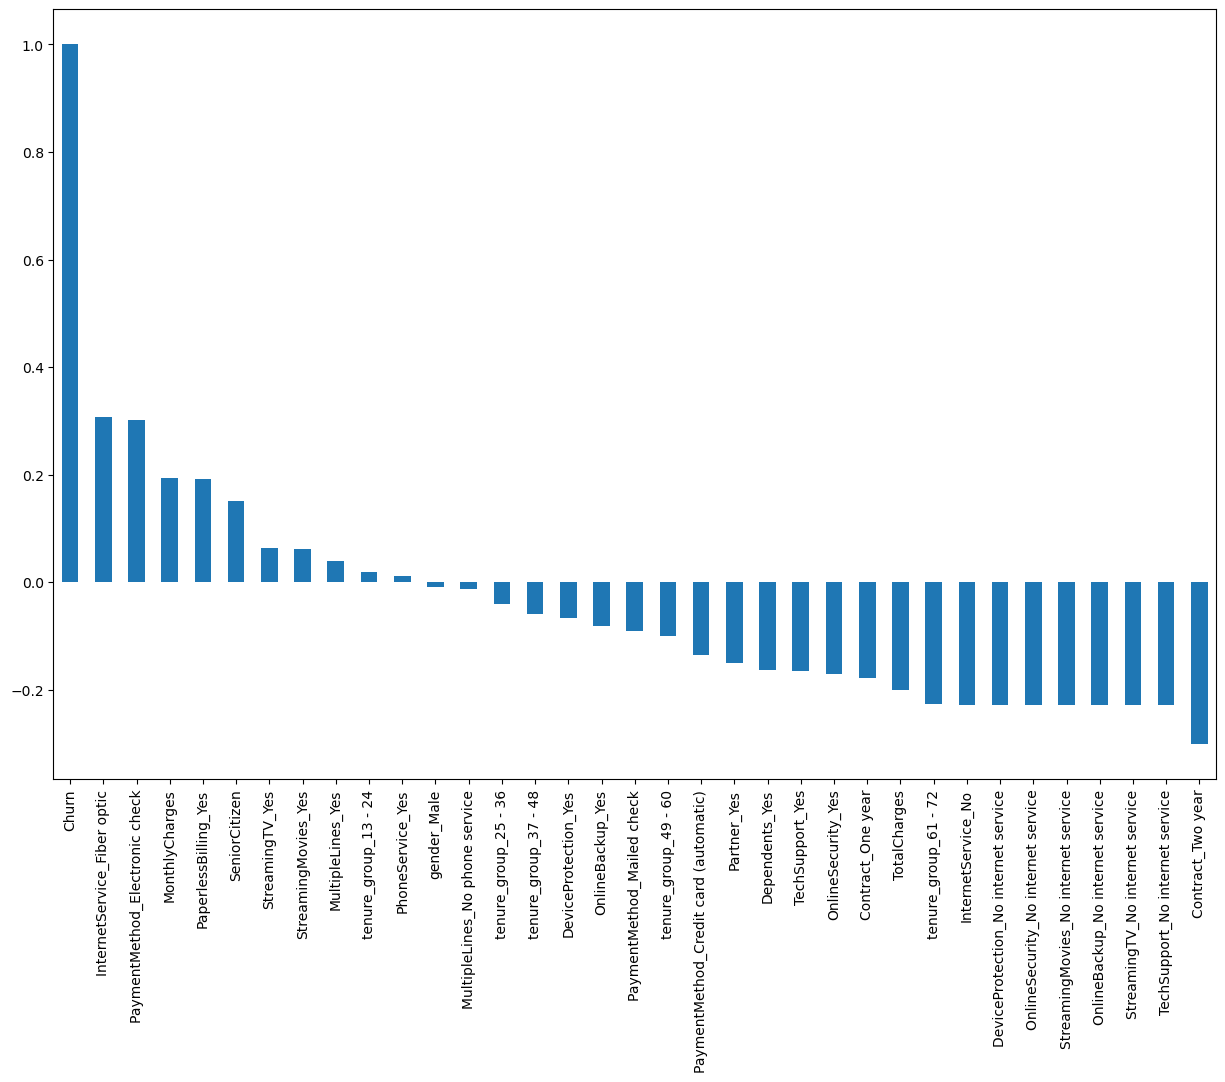

In [32]:
plt.figure(figsize=(15,10))
df3.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

High Churn seen in customers who opt for fiber optic as internet service and electronic check as payment method

Low Churn seen in customers who opt for longer

<Axes: >

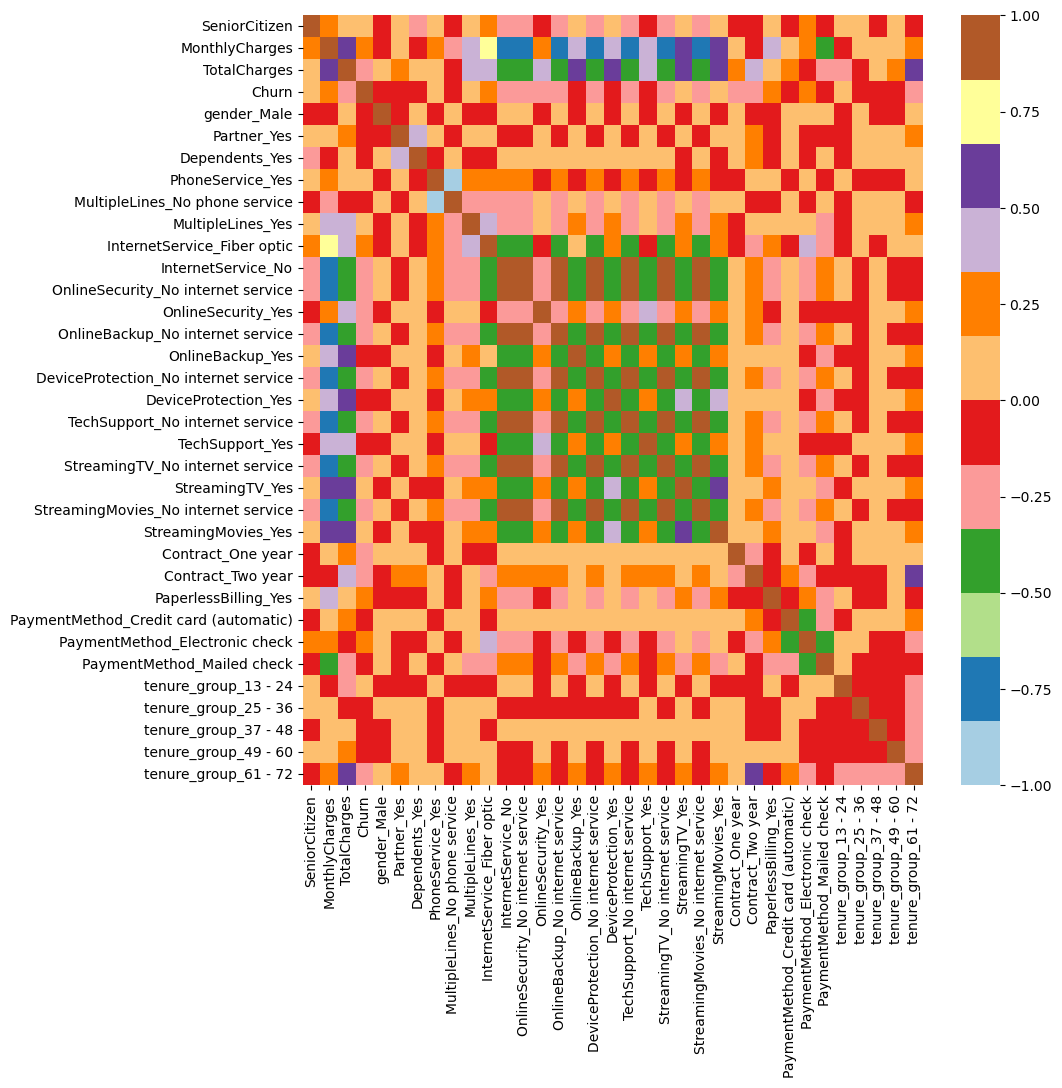

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(), cmap="Paired")

# Bivariant Analysis

In [34]:
#creating object for churnrs and non churners
new_df1_target0=new_df.loc[new_df["Churn"]==0]  #non churners
new_df1_target1=new_df.loc[new_df["Churn"]==1]  #churners

In [35]:
def uniplot(new_df, col, title, hue=None):
    plt.title(title)
    sns.countplot(data=new_df, x=col, order=new_df[col].value_counts().index, hue=hue, palette='bright')

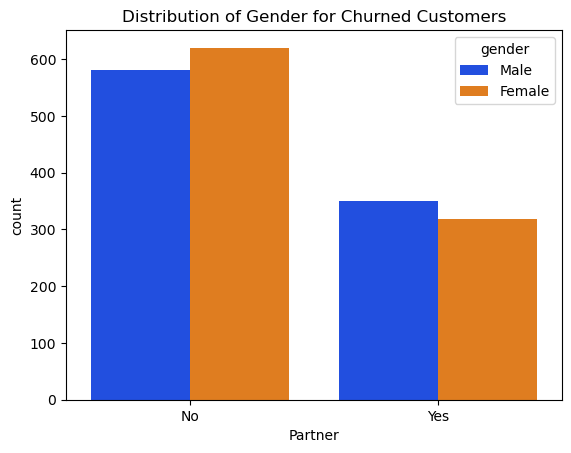

In [36]:
uniplot(new_df1_target1, col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

when there is no partner there are more churners

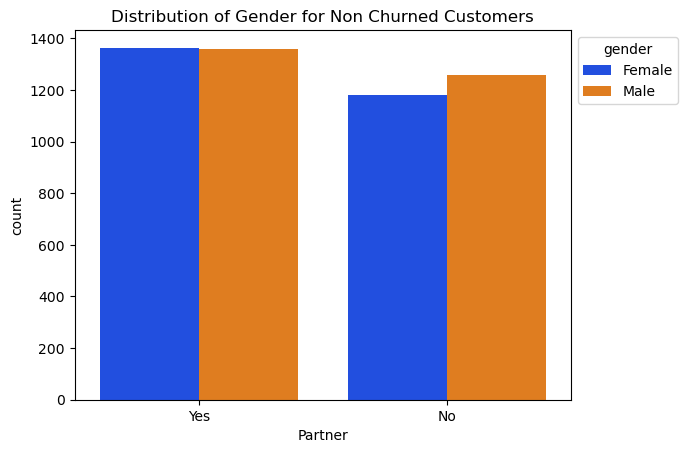

In [37]:
uniplot(new_df1_target0, col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')
plt.legend(title='gender', bbox_to_anchor=(1,1))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

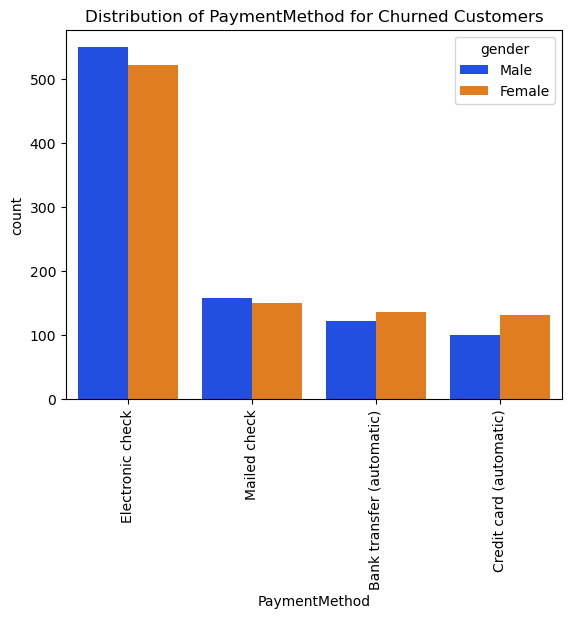

In [38]:
uniplot(new_df1_target1,col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers',hue='gender')
plt.xticks(rotation=90)

electronic check have the most churners

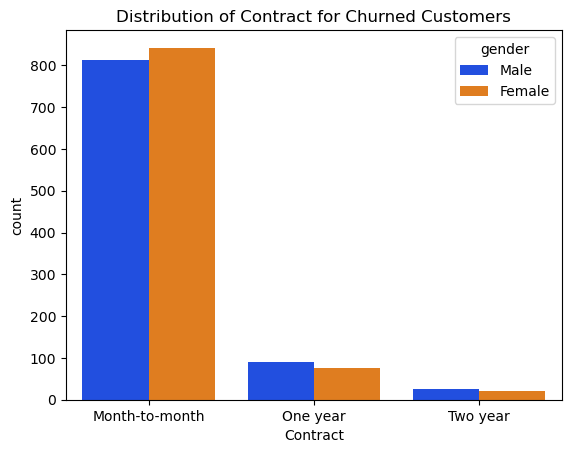

In [39]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

momth to month contract customers are the highest churners

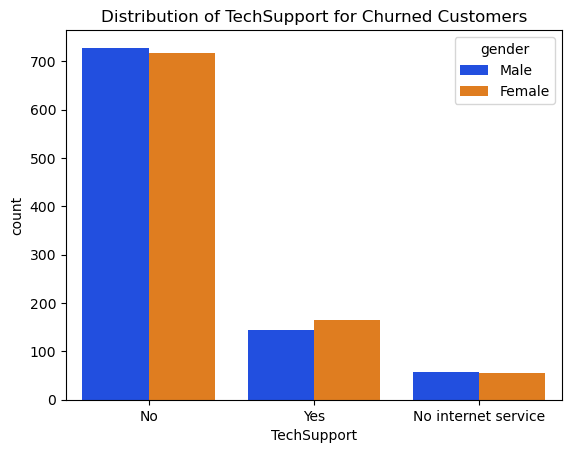

In [40]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

no tech support are the most churners

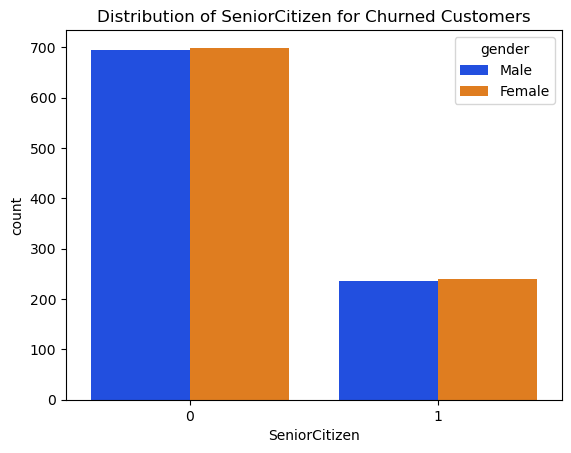

In [41]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

non senior citizens are high churners

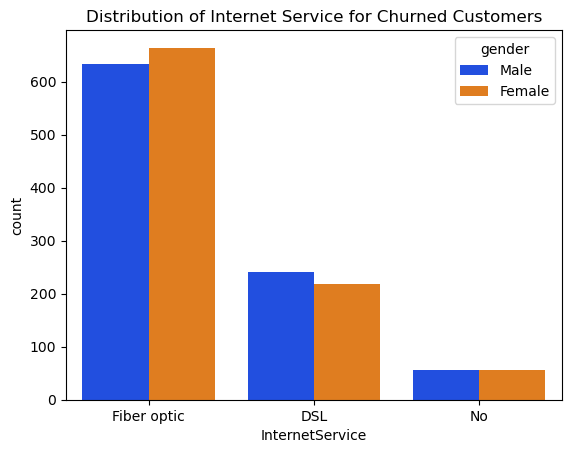

In [42]:
uniplot(new_df1_target1,col='InternetService',title='Distribution of Internet Service for Churned Customers',hue='gender')

Fiber optic customers are more likely to churn, whereas customers with no internet service are less likely to churn

# Key Insights

1. Electronic check medium are the highest churners.
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers(mostly tenure group of 1-12).
3. No Online security, No Tech Support category are high churners.
4. Non senior Citizens are high churners.
5. Fiber Optic customers are more likely to churn, whereas customers with no internet service are less likely to churn

# Model Building

In [43]:
from sklearn import set_config
set_config(display='diagram')

In [44]:
df3.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


## Seperating Dependent and Independent Variable

In [45]:
X = df3.drop('Churn',axis=1)
y = df3['Churn']

In [46]:
X.shape

(7032, 34)

In [47]:
y.shape

(7032,)

## Performing Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [50]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 20)

# Model Building with imblance dataset

In [52]:
# Defining models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Fit and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()


Logistic Regression:
Accuracy: 0.7924662402274343
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1042
           1       0.62      0.52      0.56       365

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407

[[927 115]
 [177 188]]

Decision Tree:
Accuracy: 0.7277896233120114
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1042
           1       0.48      0.48      0.48       365

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407

[[847 195]
 [188 177]]

Random Forest:
Accuracy: 0.7910447761194029
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1042
           1       0.62      0.52      0.56       3

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and here we can see that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

# Performing Smote Technique

In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [54]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [55]:
#now after using smote technique the data is balanced
y_resampled.value_counts(normalize=True)*100

1    54.26063
0    45.73937
Name: Churn, dtype: float64

In [56]:
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled,y_resampled,test_size =0.2,random_state = 20)

# Model Building with Balanced Dataset

In [57]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Fit and evaluate models
for model_name, model in models.items():
    model.fit(Xr_train, yr_train)
    yr_pred = model.predict(Xr_test)
    accuracy = accuracy_score(yr_test, yr_pred)
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(classification_report(yr_test, yr_pred))
    print(confusion_matrix(yr_test, yr_pred))
    print()


Logistic Regression:
Accuracy: 0.9302925989672978
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       560
           1       0.93      0.94      0.93       602

    accuracy                           0.93      1162
   macro avg       0.93      0.93      0.93      1162
weighted avg       0.93      0.93      0.93      1162

[[515  45]
 [ 36 566]]

Decision Tree:
Accuracy: 0.9414802065404475
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       560
           1       0.93      0.96      0.94       602

    accuracy                           0.94      1162
   macro avg       0.94      0.94      0.94      1162
weighted avg       0.94      0.94      0.94      1162

[[517  43]
 [ 25 577]]

Random Forest:
Accuracy: 0.9466437177280551
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       560
           1       0.94      0.96      0.95       6

as you can see recall, precision & f1 score for the minority class 1 i.e. churned customers has been increased after balancing the dataset,the accuracy has been also increased aswell,which tells us that our model is properly trained.

# Model Building with Feature Selection and Hyperparameter Tuning

In [58]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest with the chi-square statistical test
selector = SelectKBest(score_func=chi2, k=15)  # Select the top 15 features

# Fit the selector to the data
selector.fit(X_resampled, y_resampled)

# Get the scores and p-values for each feature
scores = selector.scores_
p_values = selector.pvalues_

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_resampled.iloc[:,selected_indices].columns

# Print the scores, p-values, and selected feature names
for score, p_value, feature in zip(scores, p_values, selected_features):
    print(f"Feature: {feature}, Score: {score}, p-value: {p_value}")
    print('')

Feature: MonthlyCharges, Score: 31.194147603499673, p-value: 2.3346887155710786e-08

Feature: TotalCharges, Score: 11916.254723468686, p-value: 0.0

Feature: Partner_Yes, Score: 2247737.9664454404, p-value: 0.0

Feature: Dependents_Yes, Score: 104.6680920404673, p-value: 1.4440790892369942e-24

Feature: InternetService_Fiber optic, Score: 675.4387520226611, p-value: 6.559111632299396e-149

Feature: InternetService_No, Score: 679.859903570269, p-value: 7.167894186414463e-150

Feature: OnlineSecurity_No internet service, Score: 1.0886218230695757, p-value: 0.2967767701349505

Feature: OnlineBackup_No internet service, Score: 45.57809014839514, p-value: 1.4667307706130626e-11

Feature: DeviceProtection_No internet service, Score: 17.50389475253204, p-value: 2.8671972508129237e-05

Feature: TechSupport_No internet service, Score: 820.924752452212, p-value: 1.5230562142244764e-180

Feature: StreamingTV_No internet service, Score: 1051.4061268642968, p-value: 1.2042125763075177e-230

Feature

In [59]:
X_fs=X_resampled[selector.get_feature_names_out()]

In [60]:
X_fs.shape

(5809, 15)

In [61]:
Xi_train,Xi_test,yi_train,yi_test = train_test_split(X_fs,y_resampled,test_size =0.2,random_state = 20)

In [62]:
from sklearn.model_selection import GridSearchCV

models = {
    'Logistic Regression': [LogisticRegression(), {'C': [0.1, 1, 10]}],
    'Decision Tree': [DecisionTreeClassifier(), {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}],
    'Random Forest': [RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy']}],
    'Gradient Boosting': [GradientBoostingClassifier(), {'learning_rate': [0.1, 0.01],'n_estimators': [100, 200, 300]}],
    'Support Vector Machine': [SVC(probability=True), {'C': [0.1, 1, 10],'gamma': [0.1, 0.01]}]
}


# Fit and evaluate models with GridSearchCV
best_models = {}  # Dictionary to store the best models

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(Xi_train, yi_train)
    
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model  # Store the best model
    
    y_pred = best_model.predict(Xi_test)
    accuracy = accuracy_score(yi_test, y_pred)
    
    print(f'{model_name}:')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(yi_test, y_pred))
    print(confusion_matrix(yi_test, y_pred))
    print('------------------------------------------------------------------------------')


Logistic Regression:
Best parameters: {'C': 1}
Accuracy: 0.9079173838209983
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       560
           1       0.90      0.93      0.91       602

    accuracy                           0.91      1162
   macro avg       0.91      0.91      0.91      1162
weighted avg       0.91      0.91      0.91      1162

[[498  62]
 [ 45 557]]
------------------------------------------------------------------------------
Decision Tree:
Best parameters: {'criterion': 'entropy', 'max_depth': 7}
Accuracy: 0.9216867469879518
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       560
           1       0.92      0.93      0.92       602

    accuracy                           0.92      1162
   macro avg       0.92      0.92      0.92      1162
weighted avg       0.92      0.92      0.92      1162

[[513  47]
 [ 44 558]]
-------------------------------------------

In [63]:
print(best_models[model_name])

SVC(C=10, gamma=0.01, probability=True)


# Model Building by Considering Feature Importance  

In [64]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X_resampled,y_resampled)

ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[0.00790759 0.03877737 0.06875683 0.01305538 0.01037339 0.00928836
 0.00102053 0.00440322 0.00828098 0.01974412 0.01068908 0.011398
 0.03546577 0.00997363 0.01040666 0.00997291 0.00788314 0.0121163
 0.02161064 0.0071247  0.00984302 0.00998189 0.00815393 0.24788142
 0.31037936 0.01221947 0.01404716 0.00980051 0.00789044 0.00755333
 0.00913313 0.00527186 0.01107538 0.01852051]


In [66]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X_resampled.columns)

<Axes: >

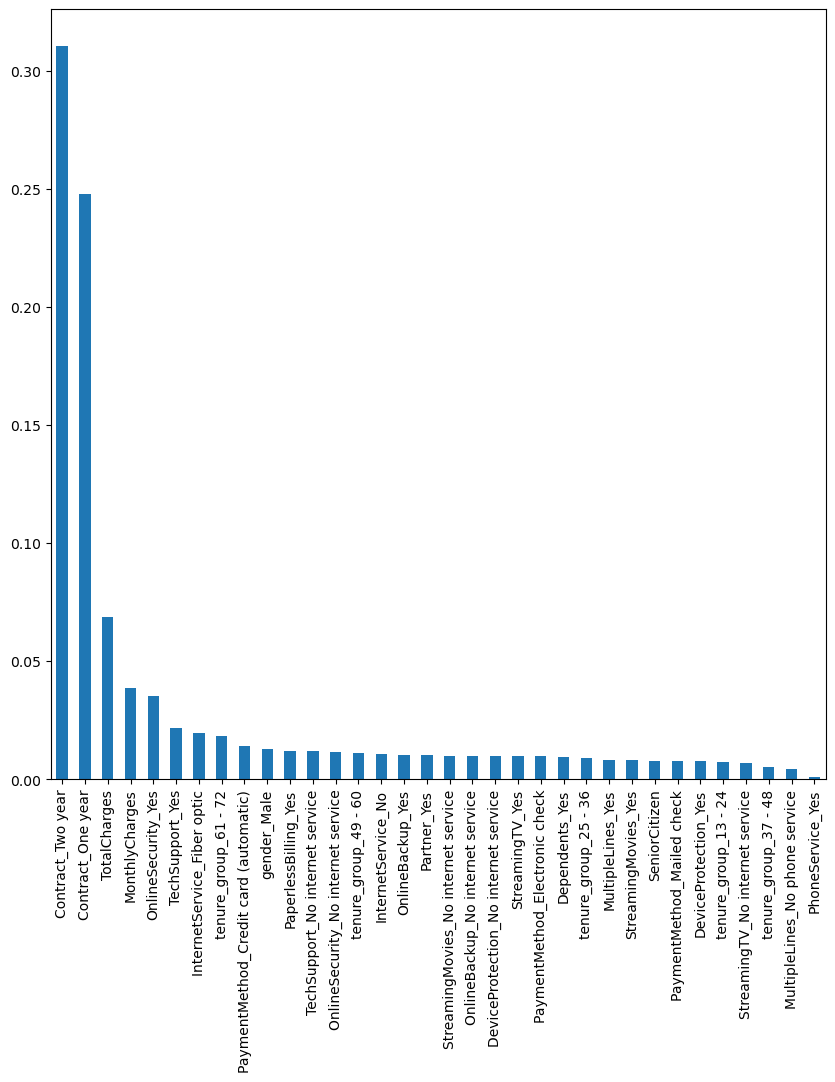

In [67]:
plt.figure(figsize=(10,10))
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [68]:
X_imp = X_resampled[feat_importances.nlargest(15).index]

In [69]:
X_imp.head()

,Contract_Two year,Contract_One year,TotalCharges,MonthlyCharges,OnlineSecurity_Yes,TechSupport_Yes,InternetService_Fiber optic,tenure_group_61 - 72,PaymentMethod_Credit card (automatic),gender_Male,PaperlessBilling_Yes,TechSupport_No internet service,OnlineSecurity_No internet service,tenure_group_49 - 60,InternetService_No
0,0,1,1889.50,56.95,1,0,0,0,0,1,0,0,0,0,0
1,0,1,1840.75,42.30,1,1,0,0,0,1,0,0,0,0,0
2,0,1,3487.95,56.15,1,0,0,1,0,1,0,0,0,0,0
3,0,0,2686.05,105.50,1,1,1,0,0,1,1,0,0,0,0
4,1,0,7382.25,106.70,1,0,1,1,0,1,0,0,0,0,0


In [70]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y_resampled,test_size =0.2,random_state = 20)

In [71]:
from sklearn.model_selection import GridSearchCV

models = {
    'Logistic Regression': [LogisticRegression(), {'C': [0.1, 1, 10]}],
    'Decision Tree': [DecisionTreeClassifier(), {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}],
    'Random Forest': [RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy']}],
    'Gradient Boosting': [GradientBoostingClassifier(), {'learning_rate': [0.1, 0.01],'n_estimators': [100, 200, 300]}],
    'Support Vector Machine': [SVC(probability=True), {'C': [0.1, 1, 10],'gamma': [0.1, 0.01]}]
}


# Fit and evaluate models with GridSearchCV
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{model_name}:')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('------------------------------------------------------------------------------')

Logistic Regression:
Best parameters: {'C': 1}
Accuracy: 0.9104991394148021
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       560
           1       0.90      0.93      0.91       602

    accuracy                           0.91      1162
   macro avg       0.91      0.91      0.91      1162
weighted avg       0.91      0.91      0.91      1162

[[499  61]
 [ 43 559]]
------------------------------------------------------------------------------
Decision Tree:
Best parameters: {'criterion': 'entropy', 'max_depth': 8}
Accuracy: 0.9371772805507745
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       560
           1       0.93      0.95      0.94       602

    accuracy                           0.94      1162
   macro avg       0.94      0.94      0.94      1162
weighted avg       0.94      0.94      0.94      1162

[[516  44]
 [ 29 573]]
-------------------------------------------

# Model Building with PCA

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size =0.2,random_state = 20)

In [73]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9, random_state=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [74]:
models = {
    'Logistic Regression': [LogisticRegression(), {'C': [0.1, 1, 10]}],
    'Decision Tree': [DecisionTreeClassifier(), {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}],
    'Random Forest': [RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy']}],
    'Gradient Boosting': [GradientBoostingClassifier(), {'learning_rate': [0.1, 0.01],'n_estimators': [100, 200, 300]}],
    'Support Vector Machine': [SVC(probability=True), {'C': [0.1, 1, 10],'gamma': [0.1, 0.01]}]
}


# Fit and evaluate models with GridSearchCV
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{model_name}:')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('------------------------------------------------------------------------------')

Logistic Regression:
Best parameters: {'C': 0.1}
Accuracy: 0.6282271944922547
              precision    recall  f1-score   support

           0       0.69      0.42      0.52       560
           1       0.60      0.83      0.70       602

    accuracy                           0.63      1162
   macro avg       0.65      0.62      0.61      1162
weighted avg       0.64      0.63      0.61      1162

[[233 327]
 [105 497]]
------------------------------------------------------------------------------
Decision Tree:
Best parameters: {'criterion': 'gini', 'max_depth': 8}
Accuracy: 0.7409638554216867
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       560
           1       0.72      0.82      0.77       602

    accuracy                           0.74      1162
   macro avg       0.75      0.74      0.74      1162
weighted avg       0.75      0.74      0.74      1162

[[365 195]
 [106 496]]
--------------------------------------------

In [75]:
new_df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int32
tenure_group        category
dtype: object

In [76]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [77]:
import pickle

In [78]:
file = 'best_model.pkl'

In [79]:
pickle.dump(best_models[model_name], open(file, 'wb'))

In [80]:
best_models[model_name]

SVC(C=10, gamma=0.01, probability=True)

In [81]:
load_model = pickle.load(open(file, 'rb'))

In [82]:
y_pred = load_model.predict(Xi_test)

In [83]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])